<a href="https://colab.research.google.com/github/kavinda-athu/Image-processing-assignment-1/blob/main/Question1%2C2%2C3%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


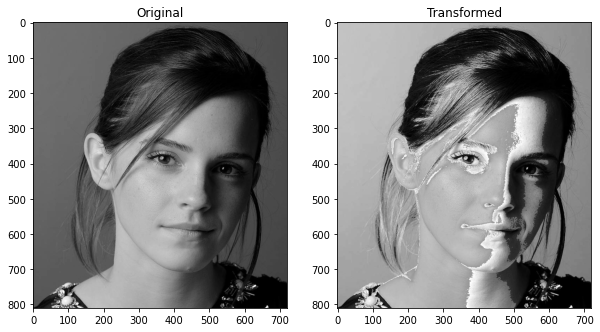

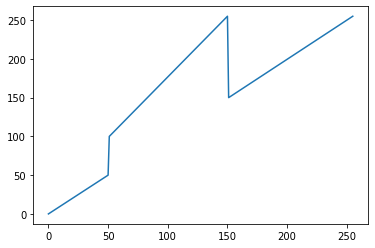

In [2]:
#Q1
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

pic=cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert pic is not None

#making lookup table
t1 = np.linspace(0,50,51);
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,105)
t = np.concatenate((t1,t2,t3),axis=0)

#applying the intencity transform
out_pic = cv.LUT(pic,t);

#ploting images
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(pic,cmap="gray",vmax=255,vmin=0)
ax[0].set_title("Original")
ax[1].imshow(out_pic,cmap="gray",vmax=255,vmin=0)
ax[1].set_title("Transformed")
plt.show()
plt.figure
plt.plot(t)

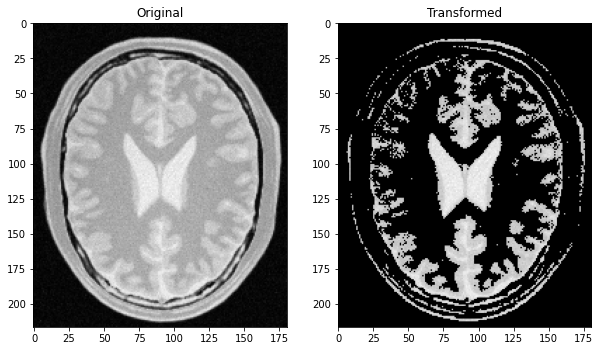

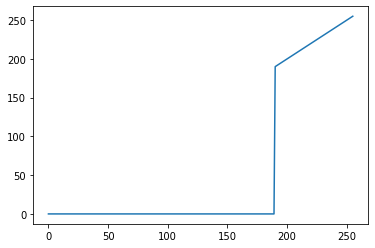

In [3]:
#Q2 part a
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

pic=cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert pic is not None

#making lookup table white matter
t1=np.linspace(0,0,190)
t2=np.linspace(190,255,66)
t = np.concatenate((t1,t2),axis=0)

#applying the intencity transform
out_pic = cv.LUT(pic,t);

#ploting images
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(pic,cmap="gray",vmax=255,vmin=0)
ax[0].set_title("Original")
ax[1].imshow(out_pic,cmap="gray",vmax=255,vmin=0)
ax[1].set_title("Transformed")
plt.show()
plt.figure
plt.plot(t)

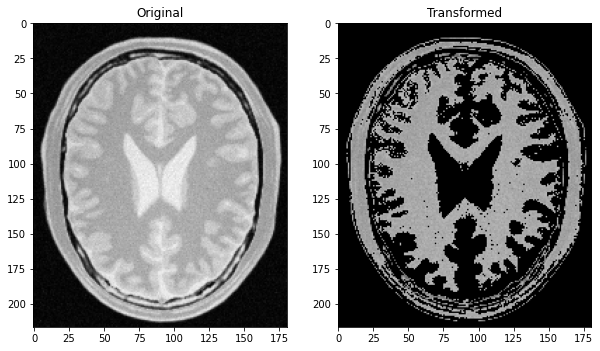

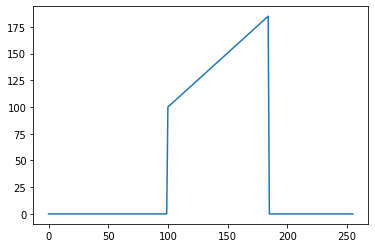

In [4]:
#Q2 part b
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

pic=cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert pic is not None

#making lookup table for gray matter
t1=np.linspace(0,0,100)
t2=np.linspace(100,185,85)
t3 = np.linspace(0,0,71)
t = np.concatenate((t1,t2,t3),axis=0)

#applying the intencity transform
out_pic = cv.LUT(pic,t);

#ploting images
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(pic,cmap="gray",vmax=255,vmin=0)
ax[0].set_title("Original")
ax[1].imshow(out_pic,cmap="gray",vmax=255,vmin=0)
ax[1].set_title("Transformed")
plt.show()
plt.figure
plt.plot(t)

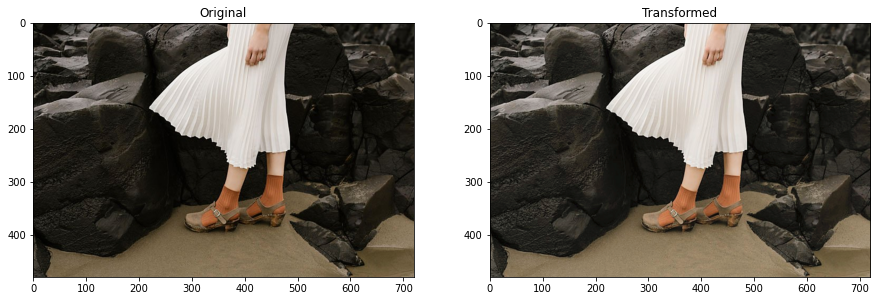

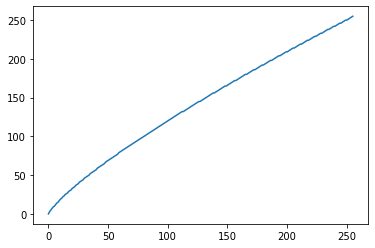

In [5]:
#Q3 part a
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

pic=cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert pic is not None
#converting to LAB colorspace
LAB_pic = cv.cvtColor(pic,cv.COLOR_BGR2LAB)
#splitting L,A,B values
L = LAB_pic[:,:,0]
A = LAB_pic[:,:,1]
B = LAB_pic[:,:,2]
#applying gamma tranform
gamma2=0.8
t=np.array([(p/255)**gamma2*255 for p in range(0,256)]).astype(np.uint8)
L = cv.LUT(L,t)
#merging sperated L,A,B
LAB_pic=cv.merge((L,A,B))
#converting RGB to plot
final_pic=cv.cvtColor(LAB_pic,cv.COLOR_LAB2RGB)
pic=cv.cvtColor(pic,cv.COLOR_BGR2RGB)

#ploting images
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].imshow(pic)
ax[0].set_title("Original")
ax[1].imshow(final_pic)
ax[1].set_title("Transformed")
plt.show()
plt.figure
plt.plot(t)

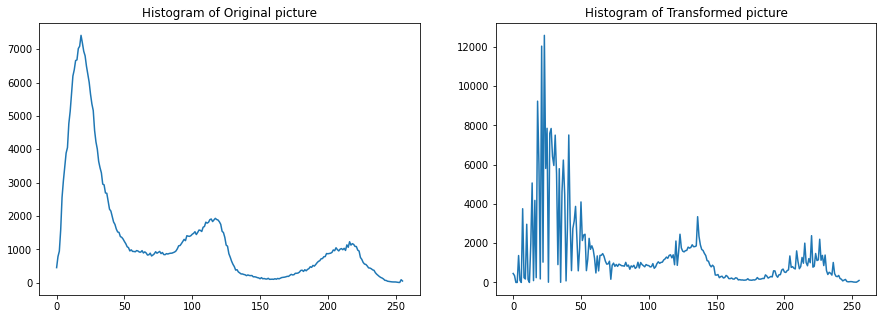

In [6]:
#Q3 part b
final_pic=cv.cvtColor(final_pic,cv.COLOR_RGB2GRAY)
pic=cv.cvtColor(pic,cv.COLOR_RGB2GRAY)

pic_hist = cv.calcHist([pic],[0],None,[256],[0,256]);
final_pic_hist = cv.calcHist([final_pic],[0],None,[256],[0,256]);
#ploting images
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(pic_hist)
ax[0].set_title("Histogram of Original picture")
ax[1].plot(final_pic_hist)
ax[1].set_title("Histogram of Transformed picture")
plt.show()

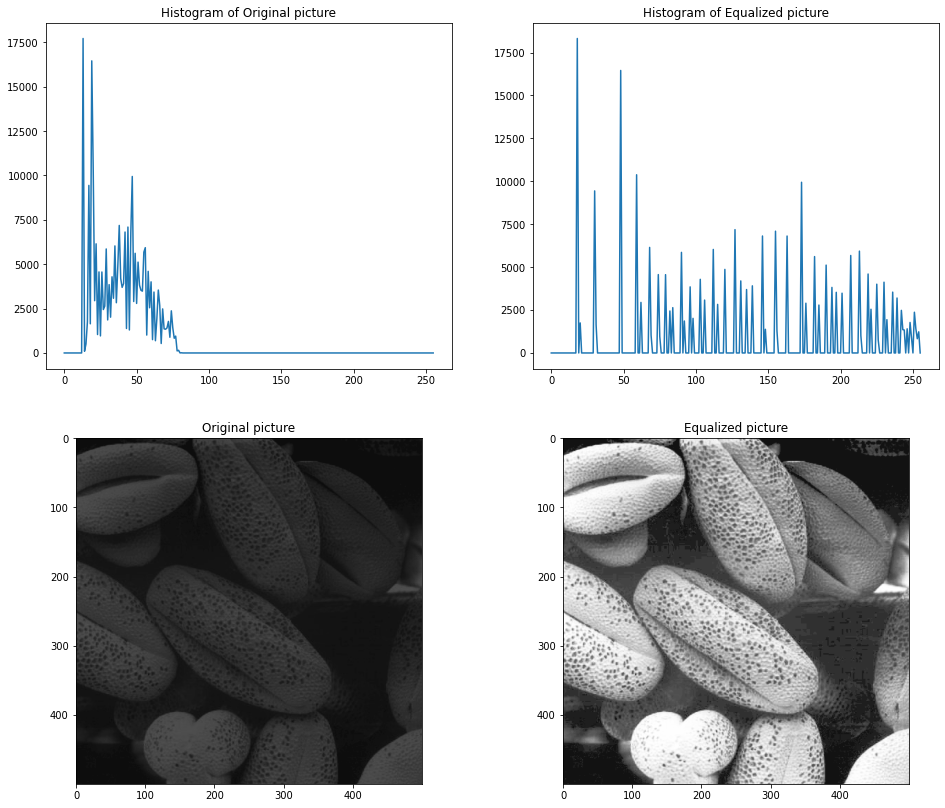

In [7]:
#Q4
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

pic=cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/shells.png', cv.IMREAD_GRAYSCALE)
assert pic is not None

pic_hist = cv.calcHist([pic],[0],None,[256],[0,256]);
pixels = pic.size
PMF = pic_hist.astype(np.float32) / pixels
CDF = np.zeros(PMF.shape[0],dtype=np.float32)

for i in range(PMF.shape[0]):
  if i:
    CDF[i] = CDF[i-1] + PMF[i];
  else:
    CDF[i] = PMF[i];

t = np.array(CDF * (255)).astype(np.uint8)

eq_pic = cv.LUT(pic,t)
eq_pic_hist = cv.calcHist([eq_pic],[0],None,[256],[0,256])


#ploting histograms
fig,ax = plt.subplots(2,2,figsize=(16,14))
ax[0,0].plot(pic_hist)
ax[0,0].set_title("Histogram of Original picture")
ax[0,1].plot(eq_pic_hist)
ax[0,1].set_title("Histogram of Equalized picture")
ax[1,0].imshow(pic,cmap="gray",vmax=255,vmin=0)
ax[1,0].set_title("Original picture")
ax[1,1].imshow(eq_pic,cmap="gray",vmax=255,vmin=0)
ax[1,1].set_title("Equalized picture")
plt.show()
